This notebook plots the Stable and Unstable systems, as well as whether it was predicted by XGBoost to be stable or not.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [8]:
data = pd.read_csv("../data/ari.csv",header=0)

In [50]:
data.head()

,Sim_ID,daOverRH1,daOverRH2,predprob,Stable,Norbits_instability,predstable
0,1648,6.879240,7.131643,0.472973,True,1.000000e+07,True
1,3471,8.496936,5.371167,0.049413,False,8.233677e+05,False
2,3849,6.822671,5.825163,0.008470,False,7.204145e+03,False
3,3537,5.092680,6.103170,0.003031,False,5.851915e+03,False
4,4214,8.928228,5.186531,0.197411,False,6.435885e+06,False


In [154]:
RHThresh = 14.9
XGBThresh = 0.45
Stable = data[data["Stable"]==True]
Unstable = data[data["Stable"]==False]

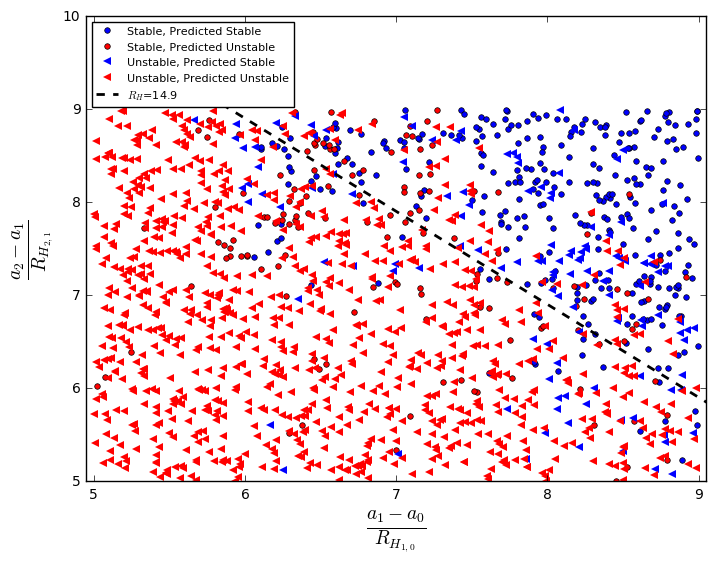

In [165]:
fig, axes = plt.subplots(figsize=(8,6))
stable_pred_color="Blue"
unstable_pred_color="Red"
axes.plot(Stable["daOverRH1"].loc[Stable["predprob"]>XGBThresh],Stable["daOverRH2"].loc[Stable["predprob"]>XGBThresh],marker="o",markersize=4,color=stable_pred_color,linestyle="None",label="Stable, Predicted Stable")
axes.plot(Stable["daOverRH1"].loc[Stable["predprob"]<=XGBThresh],Stable["daOverRH2"].loc[Stable["predprob"]<=XGBThresh],marker="o",markersize=4,color=unstable_pred_color,linestyle="None",label="Stable, Predicted Unstable")
axes.plot(Unstable["daOverRH1"].loc[Unstable["predprob"]>XGBThresh],Unstable["daOverRH2"].loc[Unstable["predprob"]>XGBThresh],marker="<",markersize=6,mew=0,color=stable_pred_color,linestyle="None",label="Unstable, Predicted Stable")
axes.plot(Unstable["daOverRH1"].loc[Unstable["predprob"]<=XGBThresh],Unstable["daOverRH2"].loc[Unstable["predprob"]<=XGBThresh],marker="<",markersize=6,mew=0,color=unstable_pred_color,linestyle="None",label="Unstable, Predicted Unstable")

axes.set_ylim([5,10])
axes.set_xlim([4.95,9.05])
axes.set_xlabel(r"$ \frac{a_1 - a_0}{R_{H_{1,0}}}$", fontsize=20)
axes.set_ylabel(r"$ \frac{a_2 - a_1}{R_{H_{2,1}}}$", fontsize=20)

#Lissauer et al. (2011)
x = np.arange(5,9.5,0.1)
axes.plot(x,RHThresh-x, 'k--', lw=2, label='$R_{H}$=%.1f'%RHThresh)

leg = axes.legend(loc="upper left",numpoints=1,fontsize=8,scatterpoints=1)

plt.savefig("../data/ari_twocolor.pdf")

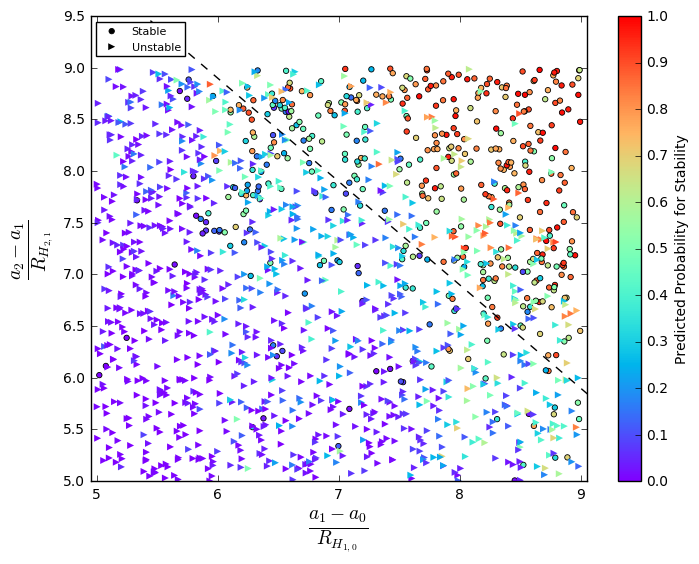

In [113]:
fig, axes = plt.subplots(figsize=(8,6))
im = axes.scatter(Stable["daOverRH1"],Stable["daOverRH2"],marker="o",s=15,lw=0.6,c=Stable["predprob"],cmap=cm.rainbow,vmin=0,vmax=1,label="Stable")
im2 = axes.scatter(Unstable["daOverRH1"],Unstable["daOverRH2"],marker=">",s=25,lw=0,c=Unstable["predprob"],cmap=cm.rainbow,vmin=0,vmax=1,label="Unstable")
plt.colorbar(im, label='Predicted Probability for Stability')
axes.set_ylim([5,9.5])
axes.set_xlim([4.95,9.05])
axes.set_xlabel(r"$ \frac{a_1 - a_0}{R_{H_{1,0}}}$", fontsize=20)
axes.set_ylabel(r"$ \frac{a_2 - a_1}{R_{H_{2,1}}}$", fontsize=20)
leg = axes.legend(loc="upper left",numpoints=1,fontsize=8,scatterpoints=1)
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')

#Lissauer et al. (2011)
x = np.arange(5,9.5,0.1)
axes.plot(x,14.9-x, 'k--')

plt.savefig("../data/ari.pdf")